## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt


batting73 = pd.read_csv('batting7320.csv')
batting73.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aaronha01,1973,1,ATL,NL,120,392,84,118,12,1,40,96,1,1,68,51,13,1,0,4,7
1,abbotgl01,1973,1,OAK,AL,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,acostcy01,1973,1,CHA,AL,48,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,adamsmi02,1973,1,MIN,AL,55,66,21,14,2,0,3,6,2,1,17,18,0,1,0,0,2
4,ageeto01,1973,1,HOU,NL,83,204,30,48,5,2,8,15,2,5,16,55,1,1,0,0,4


In [3]:
# Making names dummy variables

df_names = pd.get_dummies(batting73['playerID'])

In [4]:
# Making the new dataframe with the dummy variable for playerID

df_new = pd.concat([df_names, batting73.yearID, batting73.G, batting73.AB, batting73.R, batting73.H, batting73["2B"], batting73["3B"], batting73.HR, batting73.RBI, batting73.SB, batting73.CS, batting73.BB, batting73.SO], axis=1)

df_new.head()

,aardsda01,aaronha01,aasedo01,abadan01,abadfe01,abbotgl01,abbotje01,abbotji01,abbotku01,abbotky01,abbotpa01,abercre01,abernbr01,abnersh01,abregjo01,abreual01,abreubo01,abreubr01,abreujo02,abreuju01,abreuto01,abreuwi01,accarje01,aceveal01,acevejo01,aceveju01,achteaj01,ackerji01,ackledu01,acostcy01,acostma01,acrema01,acunaro01,adamecr01,adamewi01,adamja01,adamsau01,adamsau02,adamsbo04,adamsch01,...,zeileto01,zerbech01,zeuchtj01,zieglbr01,ziemst01,zimmebr01,zimmebr02,zimmeje02,zimmejo01,zimmejo02,zimmeky01,zimmery01,zinkch01,zinteal01,ziskri01,zitoba01,zobribe01,zoccope01,zoskyed01,zuberjo01,zuberty01,zuletju01,zumayjo01,zuninmi01,zupcibo01,zuvelpa01,zychto01,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1973,120,392,84,118,12,1,40,96,1,1,68,51
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1973,5,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1973,48,1,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1973,55,66,21,14,2,0,3,6,2,1,17,18
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1973,83,204,30,48,5,2,8,15,2,5,16,55


In [5]:
# creating a column that returns Yes if a player hit at least 20 homers, No if not. This is the target variable

df_new['20+HR?'] = np.where(df_new['HR'] >= 20, "Yes", "No")
df_new.head()

,aardsda01,aaronha01,aasedo01,abadan01,abadfe01,abbotgl01,abbotje01,abbotji01,abbotku01,abbotky01,abbotpa01,abercre01,abernbr01,abnersh01,abregjo01,abreual01,abreubo01,abreubr01,abreujo02,abreuju01,abreuto01,abreuwi01,accarje01,aceveal01,acevejo01,aceveju01,achteaj01,ackerji01,ackledu01,acostcy01,acostma01,acrema01,acunaro01,adamecr01,adamewi01,adamja01,adamsau01,adamsau02,adamsbo04,adamsch01,...,zerbech01,zeuchtj01,zieglbr01,ziemst01,zimmebr01,zimmebr02,zimmeje02,zimmejo01,zimmejo02,zimmeky01,zimmery01,zinkch01,zinteal01,ziskri01,zitoba01,zobribe01,zoccope01,zoskyed01,zuberjo01,zuberty01,zuletju01,zumayjo01,zuninmi01,zupcibo01,zuvelpa01,zychto01,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,20+HR?
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1973,120,392,84,118,12,1,40,96,1,1,68,51,Yes
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1973,5,0,0,0,0,0,0,0,0,0,0,0,No
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1973,48,1,0,0,0,0,0,0,0,0,0,1,No
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1973,55,66,21,14,2,0,3,6,2,1,17,18,No
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1973,83,204,30,48,5,2,8,15,2,5,16,55,No


In [6]:
# Splitting data into training and testing 

from sklearn.model_selection import train_test_split

y = df_new['20+HR?']
X = df_new.drop(columns=["HR", "20+HR?"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2020, stratify=y)

In [7]:
# Finding the baseline accuracy using the DummyClassifier

from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)

print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.9473381294964028


In [8]:
# Using the bagging ensemble from Scikit-Learn to fit a model (next two blocks)

from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model_bagging = BaggingClassifier(random_state = 42)
model_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  warm_start=False)

In [ ]:
# Finding the accuracy of the bagging ensemble

pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy = ', acc_bagging)

 Accuracy =  0.9803741007194244


In [ ]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
print('Classification Report:\n')
print(classification_report(y_test, pred_bagging))

Classification Report:

              precision    recall  f1-score   support

          No       0.99      0.99      0.99     16460
         Yes       0.85      0.76      0.80       915

    accuracy                           0.98     17375
   macro avg       0.92      0.88      0.90     17375
weighted avg       0.98      0.98      0.98     17375



In [ ]:
# Fitting a Random Forest Classifier to the data

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)


model_rf = RandomForestClassifier(n_estimators=10, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
precision_rf = precision_score(y_test, predict_rf, pos_label='Yes')


In [ ]:
# Finding the accuracy of the Random Forest Classifier model 

print(precision_rf)

0.8410689170182841


In [ ]:
# Finding the 10 most important features from the Random Forest Classifier model

print('Feature Importance:', model_rf.feature_importances_)
imp=pd.DataFrame(zip(X_train.columns, model_rf.feature_importances_))
print(imp)

imp.nlargest(10, 1)

Feature Importance: [1.50770271e-08 1.76078317e-04 0.00000000e+00 ... 2.37229273e-02
 9.70874688e-02 8.50732294e-02]
              0             1
0     aardsda01  1.507703e-08
1     aaronha01  1.760783e-04
2      aasedo01  0.000000e+00
3      abadan01  9.493079e-11
4      abadfe01  2.929312e-06
...         ...           ...
9714        RBI  1.185716e-01
9715         SB  3.076234e-02
9716         CS  2.372293e-02
9717         BB  9.708747e-02
9718         SO  8.507323e-02

[9719 rows x 2 columns]


,0,1
9714,RBI,0.118572
9717,BB,0.097087
9710,R,0.092298
9718,SO,0.085073
9709,AB,0.083847
9712,2B,0.075657
9708,G,0.058665
9713,3B,0.035806
9711,H,0.035699
9715,SB,0.030762


In [9]:
# Making a decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth=4, criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

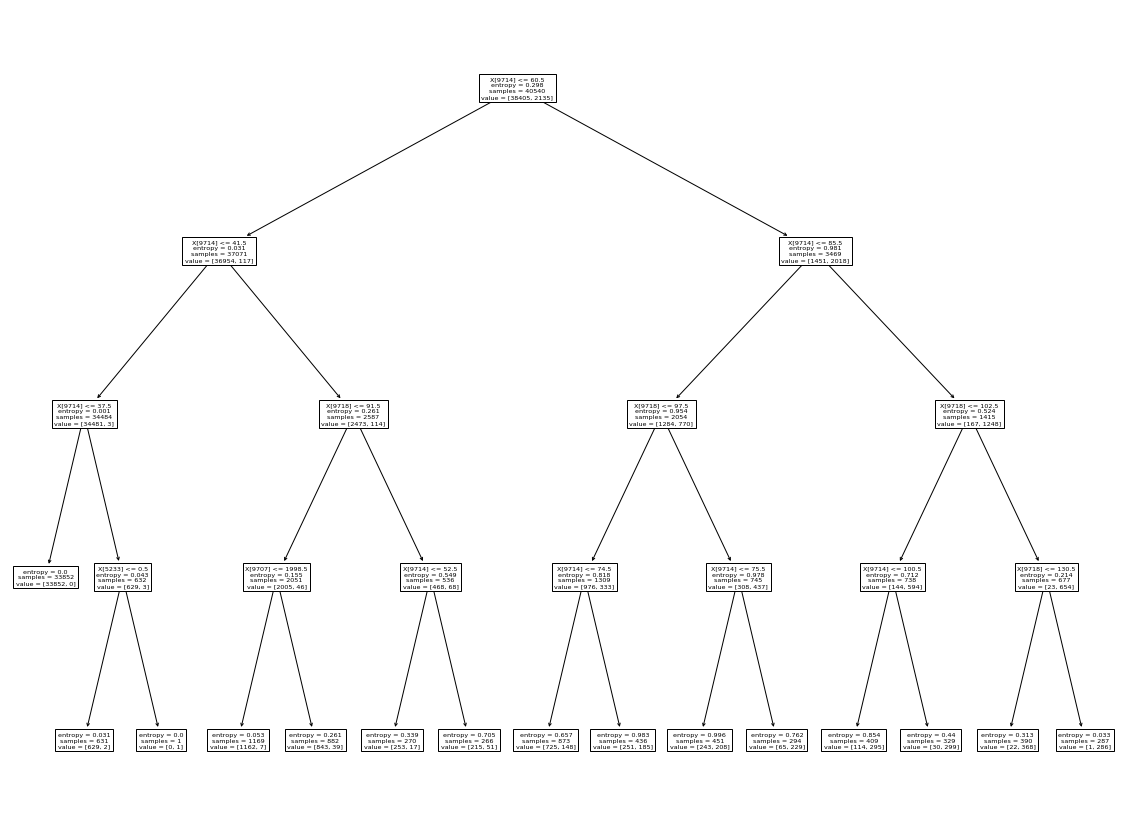

<Figure size 432x288 with 0 Axes>

In [10]:
# Plotting the tree
# Changing max_depth to simplify the model (I chose max_depth as 4 after experimenting different values)

plt.figure(figsize=(20,15))
myTree = tree.plot_tree(dt, max_depth=4)
plt.show()

plt.savefig('battingTree.png')

[[16356   104]
 [  309   606]]


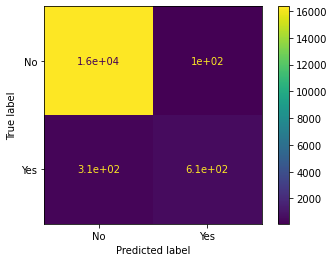

In [12]:
# Making a confusion matrix to evaluate the performance of the classification model

pred = dt.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, pred)
print(confusion_matrix)

metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()